# More exercises

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

#### Exercise

Generate an array 'x' of linearly distributed points. Create a function that linearly transforms x and then add some gaussian noise on top of it, with the variance of the noise being the original value of x. Plot the resulting data distribution.

Use the function np.linalg.lstsq() to solve the least squares problem needed to find the line that best fits the generated data. Plot the resulting line over the data distribution.

Note that the lstsq function is meant to be used for solving a linear matrix equation y = Ax . How can you adapt it to the current problem of y = mx + q ? Maybe you can find some help in the lstsq documentation (in Jupyter, access the documentation of a function by pressing Shift + Tab with the cursor in the function arguments) 

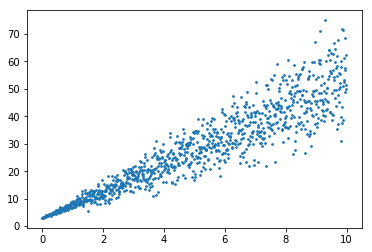

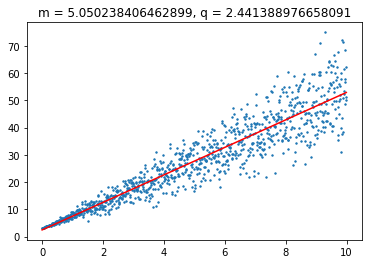

In [2]:
x = np.arange(0, 10, 0.01)

m = 5.
q = 3.
y = m*x + q + np.random.standard_normal(size = x.shape) * x

plt.scatter(x,y, s = 3)
plt.show()

data_matrix = np.array([x, np.ones_like(x)])

w = np.linalg.lstsq(data_matrix.T, y, rcond=None)[0]

line = w[0]*x+w[1]
plt.scatter(x,y,s = 2)
plt.plot(x,line,'r-')
plt.title('m = {}, q = {}'.format(w[0],w[1]))
plt.show()

#### Exercise

Generate a sine wave, with gaussian noise added to it. Plot the resulting wave and ensure that the noise isn't covering the original function, while still affecting it.

Fit polynomials with different orders over your generated data; you can do this easily by using the functions np.polyfit, which fits a polynomial of a given order to some datapoints, and np.poly1d, which builds a polynomial class on top of some weights.

Plot the different polynomials in subplots to compare their performance over the original data.

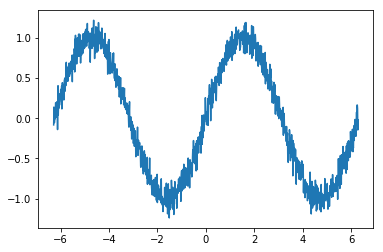

/storage/mi/pasquali/miniconda3/envs/deeptime/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


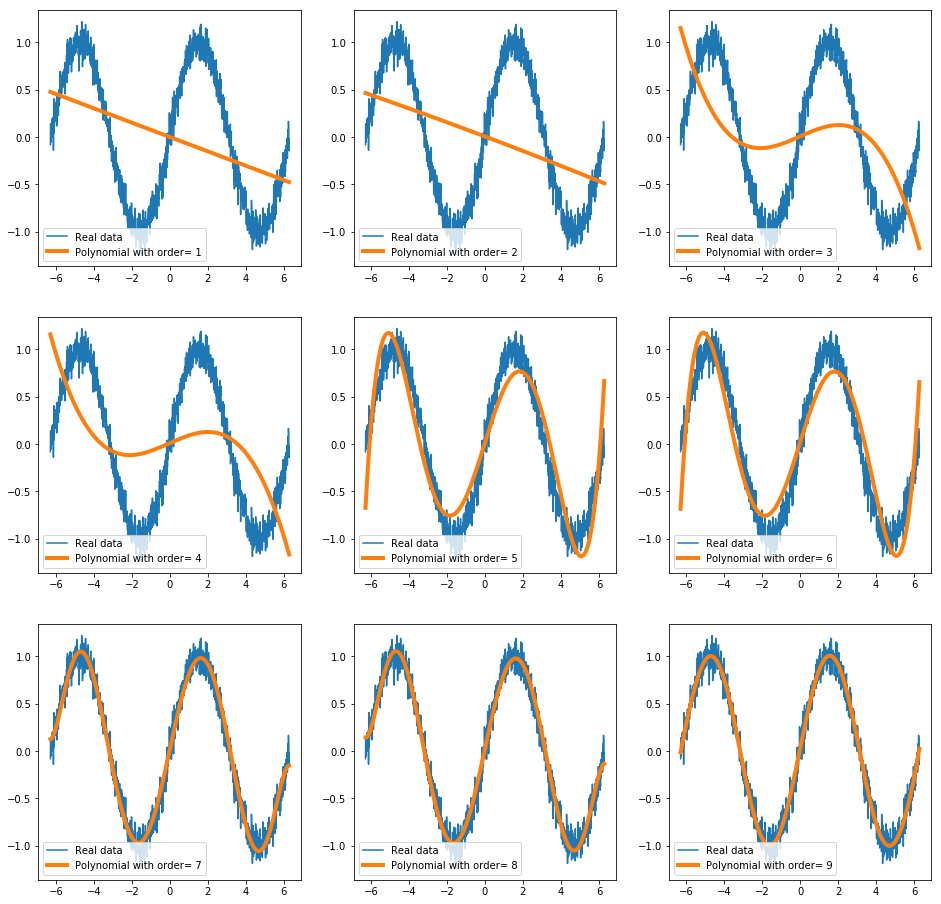

In [3]:
x = np.arange(-2*np.pi, 2*np.pi, 0.01)
y = np.sin(x) + 0.1 * np.random.standard_normal(size = x.shape)

plt.plot(x, y)
plt.show()


fig = plt.figure(figsize = (16,16))
gs = gridspec.GridSpec(3,3)

for n in range(9):
    
    ax = plt.subplot(gs[n])
    poly_order = n+1
    z = np.polyfit(x, y, poly_order)
    p = np.poly1d(z)
    
    ax.plot(x, y, label = 'Real data')
    ax.plot(x, p(x), lw = 4, label = 'Polynomial with order= {}'.format(poly_order))
    ax.legend()

fig.show()


#### Exercise

Generate points from three different 2-D gaussians (hint: you can multivariate_normal function in the np.random package):

- Centered in (-3, 0) with covariance  ((0.1, 0), (0, 5)) 
- Centered in (3, 6)  with covariance  ((1, 0.5), (0.5, 2))
- Centered in (3, 9)  with covariance  ((1, 0.5), (0.5, 2))

Visualize them on the (X,Y) plane

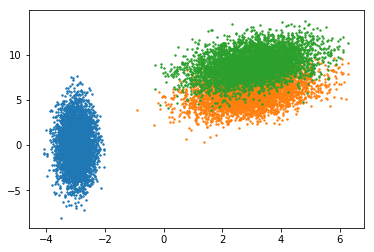

In [4]:
g1 = np.random.multivariate_normal(mean = [-3, 0],  cov = [[0.1, 0], [0, 5]], size  = 5000)
g2 = np.random.multivariate_normal(mean = [3, 6],   cov = [[1, 0.5], [0.5, 2]], size  = 5000)
g3 = np.random.multivariate_normal(mean = [3, 9],   cov = [[1, 0.5], [0.5, 2]], size  = 5000)

plt.scatter(g1[:,0], g1[:,1], s = 2)
plt.scatter(g2[:,0], g2[:,1], s = 2)
plt.scatter(g3[:,0], g3[:,1], s = 2)
plt.show()

#### Exercise

Principal component analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components. This transformation is defined in such a way that the first principal component has the largest possible variance (that is, accounts for as much of the variability in the data as possible), and each succeeding component in turn has the highest variance possible under the constraint that it is orthogonal to the preceding components. The resulting vectors are an uncorrelated orthogonal basis set.

Use the previously generated multi-gaussian dataset as a base to apply PCA on.
The implementation of PCA is as follows:

- Remove the mean from each feature of the dataset
- Calculate the covariance matrix of the mean-free dataset
- Calculate eigenvectors and eigenvalues of the covariance matrix; the magnitude of the eigenvalues indicate how much 'variance' is mapped by the related eigenvector
- Use the eigenvectors as a basis set to transform the original data

Plot the eigenvectors over the original dataset distribution, so as to visually confirm that the PCA is successfully identifying the best directions (be wary of transpositions!)

Plot the transformed dataset in the PCA space

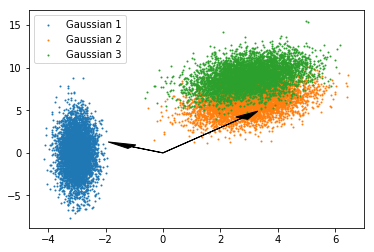

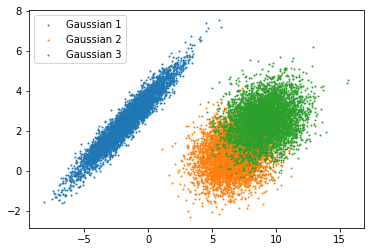

In [5]:
g1 = np.random.multivariate_normal(mean = [-3, 0],  cov = [[0.1, 0], [0, 5]], size  = 5000)
g2 = np.random.multivariate_normal(mean = [3, 6],   cov = [[1, 0.5], [0.5, 2]], size  = 5000)
g3 = np.random.multivariate_normal(mean = [3, 9],   cov = [[1, 0.5], [0.5, 2]], size  = 5000)

all_gaussians = np.concatenate((g1,g2,g3), axis = 0)

def PCA(data, dims_rescaled_data=2):
    
    m, n = data.shape
    data -= data.mean(axis=0)
    
    R = np.cov(data, rowvar=False)
    
    evals, evecs = np.linalg.eigh(R)
    
    idx = np.argsort(evals)[::-1]
    evecs = evecs[:,idx]
    evals = evals[idx]
    
    evecs = evecs[:, :dims_rescaled_data]
    
    transformed_data = data @ evecs
        
    return transformed_data, evals, evecs


t_data, evals, evecs = PCA(all_gaussians)

plt.scatter(g1[:,0], g1[:,1], s = 1, label = 'Gaussian 1')
plt.scatter(g2[:,0], g2[:,1], s = 1, label = 'Gaussian 2')
plt.scatter(g3[:,0], g3[:,1], s = 1, label = 'Gaussian 3')

for length, vector in zip(evals, evecs.T):
    v = vector * np.sqrt(length)
    plt.arrow(*all_gaussians.mean(0), *v, head_width=0.5, head_length=1, fc='k', ec='k')
    
plt.legend()
plt.show()

plt.scatter((g1 @ evecs)[:,0], (g1 @ evecs)[:,1], s = 1, label = 'Gaussian 1')
plt.scatter((g2 @ evecs)[:,0], (g2 @ evecs)[:,1], s = 1, label = 'Gaussian 2')
plt.scatter((g3 @ evecs)[:,0], (g3 @ evecs)[:,1], s = 1, label = 'Gaussian 3')

plt.legend()
plt.show()

# Day 2 morning: Numpy arrays and array operations

In [10]:
import numpy as np

Question:

Create a numpy array from a list of integers from 1 to 25, then reshape it into a 5x5 matrix. Create a copy of the array, this time setting the dtype to float64 .

Divide both arrays by 5 and check wether they are the same element wise.

Divide the second array by 2; create a new array concatenating the first two rows of a1, and the last 3 columns of a2

In [11]:
a1 = np.arange(1,26)
a1 = np.reshape(a1, (5,5))

a2 = a1.astype(np.float64)

a1 = a1/5
a2 = a2/5

print(np.array_equal(a1, a2))

a2 = a2/2

a1_rows = a1[0:2]
a2_cols = a2.T[-3:]

a3 = np.concatenate((a1_rows, a2_cols))

print(a3)

True
[[0.2 0.4 0.6 0.8 1. ]
 [1.2 1.4 1.6 1.8 2. ]
 [0.3 0.8 1.3 1.8 2.3]
 [0.4 0.9 1.4 1.9 2.4]
 [0.5 1.  1.5 2.  2.5]]


Question:

A simple way to approximate the value of pi is to draw random points inside the [0,1]x[0,1] square, then check how many of these points are inside a quarter of a circle with origin in (0,0) and radius 1; the proportion of points falling inside the radius over the total number of points approximates pi/4. Doing this with a good precision in native python can be computationally expensive, but it is easily done with numpy.

For a number of datapoints ranging from 10 to 100 million, draw 'datapoints' couples of random values sampled uniformly from [0,1], and count how many of those are inside the quarter circle. Verify how the 

In [12]:
approximated_pi = np.zeros((8))

for i in range(0, 8):
    datapoints = 10**(i+1)
    points = np.random.uniform(size = (datapoints, 2))
    radiuses = np.linalg.norm(points, axis = 1)
    inside_points = (radiuses < 1).sum()
    approximated_pi[i] = inside_points*4/datapoints

print(np.abs(1-approximated_pi/np.pi))

[1.85916358e-02 5.85924034e-03 6.87315511e-03 1.01625320e-03
 4.08476050e-03 1.86101018e-04 9.71015734e-05 2.54309195e-05]


# Day 2 afternoon: Classes and OOP

Question:

Build a 2D point class. It must accept as an initializer a 2-element iterable (if None, initialize the point with random values), and have:

- 'x' and 'y' properties that return x and y
- a 'norm' property that returns the norm of the point
- a 'distance' method that calculates the distance between the point and another given point

Write a 'rotate' function that accepts an angle in radians and returns a rotated point around the (0,0) center by that angle


In [13]:
class Point2D(object):

    def __init__(self, x = None, y = None):
        
        self.x = x if x is not None else np.random.rand()
        self.y = y if y is not None else np.random.rand()
        self.norm = np.linalg.norm([self.x,self.y])

    def distance(self, point):
        return np.linalg.norm([self.x-point.x, self.y-point.y])
        
def rotate(point, angle):#
    c, s = np.cos(angle), np.sin(angle)
    rotation_mat = np.array([[c,-s],[s,c]])
    new_x, new_y = rotation_mat @ [point.x, point.y]
    return Point2D(new_x, new_y)

a = Point2D(1,1)
print(a.x, a.y, a.norm)
print(a.distance(Point2D(-1,1)))

b = rotate(a, -np.pi)
print(b.x, b.y)

1 1 1.4142135623730951
2.0
-0.9999999999999999 -1.0000000000000002


Question:

Build an ellipse class, initialized by a (axis1, axis2), with methods that return the perimeter and the surface of the ellipse, and a random point on the ellipse. (Tip: ellipse perimeter is approximately  pi*[3(a+b) - sqrt((3a+b)(a+3b))])
Build a sphere class that inherits the ellipse class, but overrides the ellipse's methods with simpler ones.

Write a 'ratio' function that calculates the perimeter to surface area and test wether it works with both ellipses and spheres.
Build a square class that's not a subclass of the ellipse, but has the same methods. Does the 'ratio' function work with a square too?

In [14]:
class Ellipse(object):
    
    def __init__(self, a, b):
        self.a = a
        self.b = b
    
    def per(self):
        return np.pi * (3 * (self.a + self.b) - np.sqrt((3 * self.a + self.b) * (self.a + 3 * self.b)))
    
    def surf(self):
        return np.pi * self.a * self.b
    


class Sphere(Ellipse):
    
    def __init__(self, r):
        Ellipse.__init__(self, r, r)
        
        
    
def per_over_surf(ellipse):
    return ellipse.per() / ellipse.surf()



class Square(object):
    
    def __init__(self, l):
        self.l = l
    
    def per(self):
        return 4 * self.l
    
    def surf(self):
        return self.l * self.l
    

    
print(per_over_surf(Sphere(4)))
print(per_over_surf(Square(4)))

0.5
1.0


# Day 3 morning: Matplotlib

In [15]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

Draw a sine and cosine in a plot. Make them with different colors, labeled so as to recognize them, with different widths and styles. Change the ticks on the x and y axes so that there's only 3 visible, and increase the font of the labels.
Add a horizontal line at y = 0

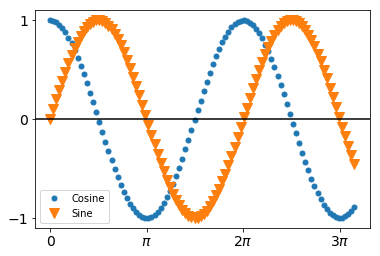

In [16]:
x = np.arange(0, 10, 0.1)
c = np.cos(x)
s = np.sin(x)

plt.plot(x, c, 'o', label = 'Cosine', ms = 5)
plt.plot(x, s, 'v', label = 'Sine', ms = 10)
plt.legend()
ticks = [i*np.pi for i in range(4)]
tick_lab = ['0', r'$\pi$']+[str(i)+r'$\pi$' for i in range(2,4)]
plt.xticks(ticks, tick_lab, fontsize = 14)
plt.yticks([-1,0,1], fontsize = 14)
plt.axhline(0, c= 'k')
plt.show()

Draw a 3x3 grid of plots; for every cell, plot a sine and cosine wave with frequency equal to the cell's row and column index respectively. The GridSpec class, from matplotlib.gridspec, is useful for building a grid of axes objects that can host a plot.

/storage/mi/pasquali/miniconda3/envs/deeptime/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


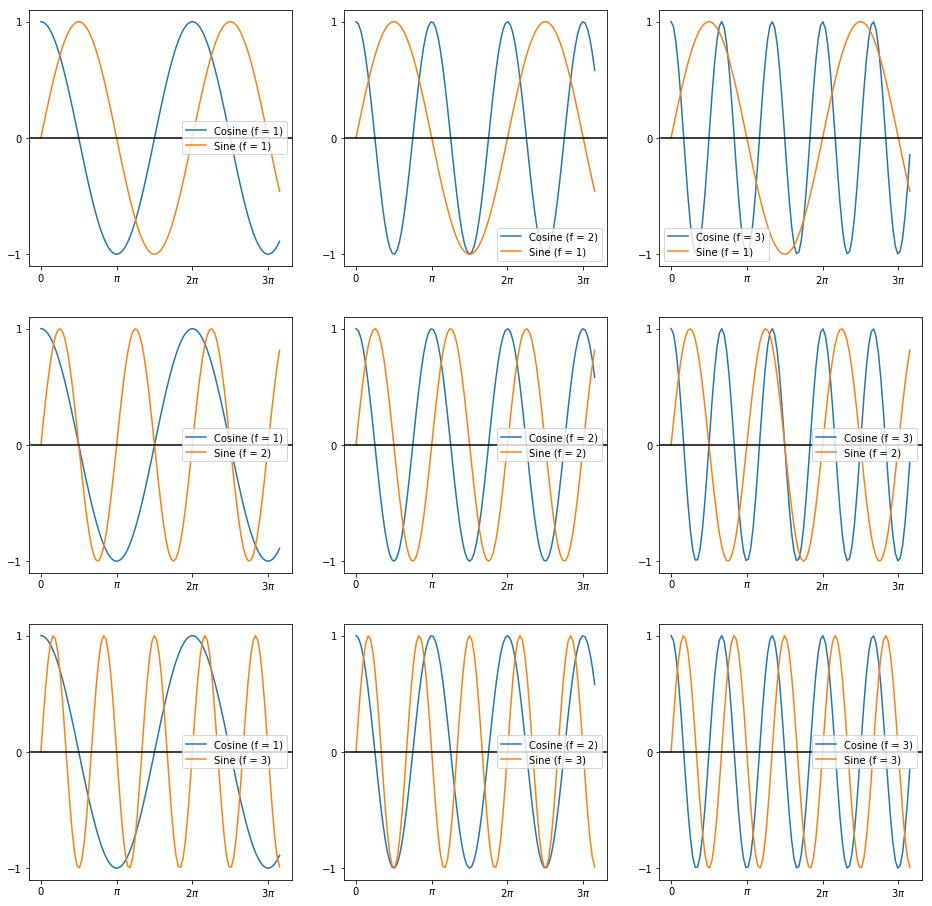

In [17]:
def plot_sin_cos(ax, f_s, f_c):
    x = np.arange(0, 10, 0.1)
    c = np.cos(f_c * x)
    s = np.sin(f_s * x)

    ax.plot(x, c, label = 'Cosine (f = {})'.format(f_c))
    ax.plot(x, s, label = 'Sine (f = {})'.format(f_s))
    ax.legend()
    ticks = [i*np.pi for i in range(4)]
    tick_lab = ['0', r'$\pi$']+[str(i)+r'$\pi$' for i in range(2,4)]
    ax.set_xticks(ticks)
    ax.set_xticklabels(tick_lab)
    ax.set_yticks([-1,0,1])
    ax.axhline(0, c= 'k')



fig = plt.figure(figsize = (16,16))
gs = gridspec.GridSpec(3,3)

for n in range(9):
    ax = plt.subplot(gs[n])
    plot_sin_cos(ax, n//3+1, n%3+1)

fig.show()